# 3.3 Types of Visualisations

The choice of graph we should use depends on the type of data we are visualising. In this section, we will cover the most common types of graphs and when to use them.

Firstly, we will look at the top-5 weekend gross ticket sales in the US on the Christmas weekend in 2017. (Credit: [Fundamentals of Data Visualization](https://clauswilke.com/dataviz/visualizing-amounts.html))

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from PIL import Image

plt.style.use('seaborn')
sns.set_theme(style="whitegrid")

Reading the data:

In [2]:
df = pd.read_csv('media/movie_data.csv')
df

,Rank,Title,Weekend gross (million USD)
0,1,Star Wars: The Last Jedi,71.565498
1,2,Jumanji: Welcome to the Jungle,36.169328
2,3,Pitch Perfect 3,19.928525
3,4,The Greatest Showman,8.058430
4,5,Ferdinand,7.316746


## Visualising amounts

**Scenario**: Let's say we want to visualise the magnitude of some set of numbers against categorical data. In this case, we can use a **bar chart**.

Let's look at the gross ticket sales for each film.

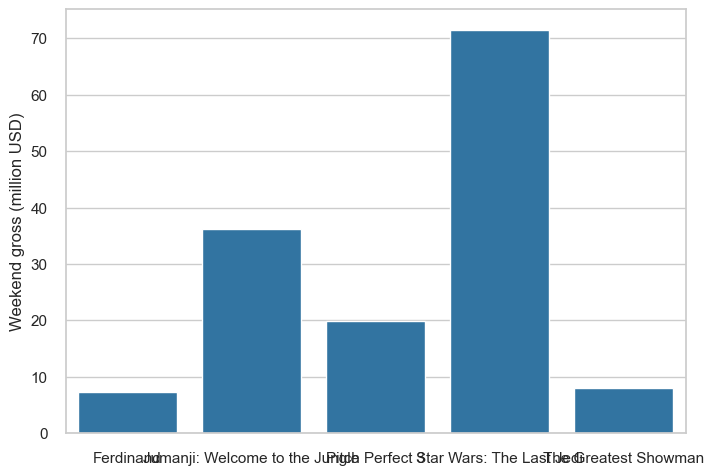

In [3]:
sns.barplot(x='Title', y='Weekend gross (million USD)', data=df.sort_values(by=['Title']), color='tab:blue')
plt.xlabel('')
plt.show()

As you can see, the labels are too long. You can rotate the labels to make them fit, resize the figure or text, or you could consider using a horizontal bar chart instead. 

Can you think of any other ways to improve this graph?

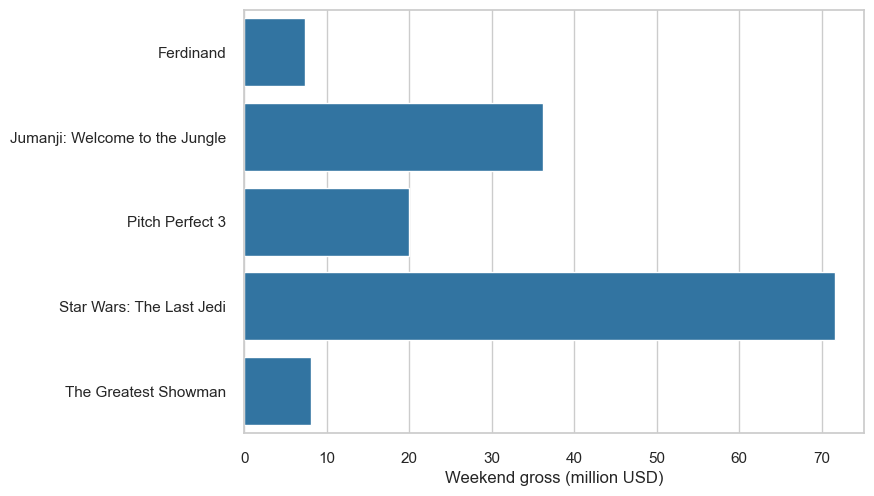

In [4]:
sns.barplot(y='Title', x='Weekend gross (million USD)', data=df.sort_values(by=['Title']), color='tab:blue')
plt.ylabel('')
plt.show()

The bars are ordered by alphabetical order. While this might be useful for looking up some categories, it does not clearly highlight that Star Wars is the highest grossing film. In this case, it would be clearer to read the graph if the bars were ordered by the amount of money they grossed:

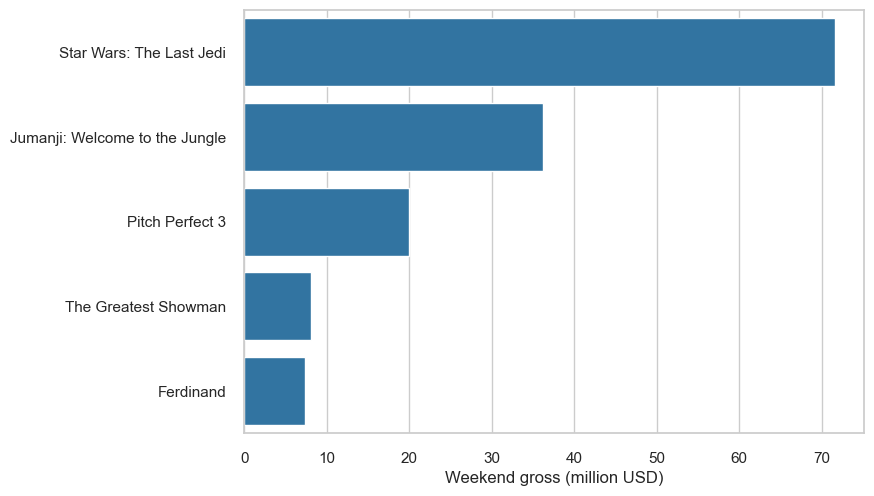

In [5]:
sns.barplot(y='Title', x='Weekend gross (million USD)', data=df.sort_values(by=['Weekend gross (million USD)'], ascending=False), color='tab:blue')
plt.ylabel('')
plt.show()

However, if there is a intuitive ordering to the bars, then it is better to use that ordering. Taking an example of median weekly pay versus age group, it is more intuitive to order the bars by age group:

[Source: ONS Annual Survey of Hours and Earnings](https://commonslibrary.parliament.uk/research-briefings/cbp-8456/)

In [6]:
weekly_pay_df = pd.read_csv('media/median_pay_2022.csv')
weekly_pay_df

,Age,Median weekly pay (£)
0,16-17,229
1,18-21,402
2,22-29,546
3,30-39,678
4,40-49,727
5,50-59,681
6,60+,603


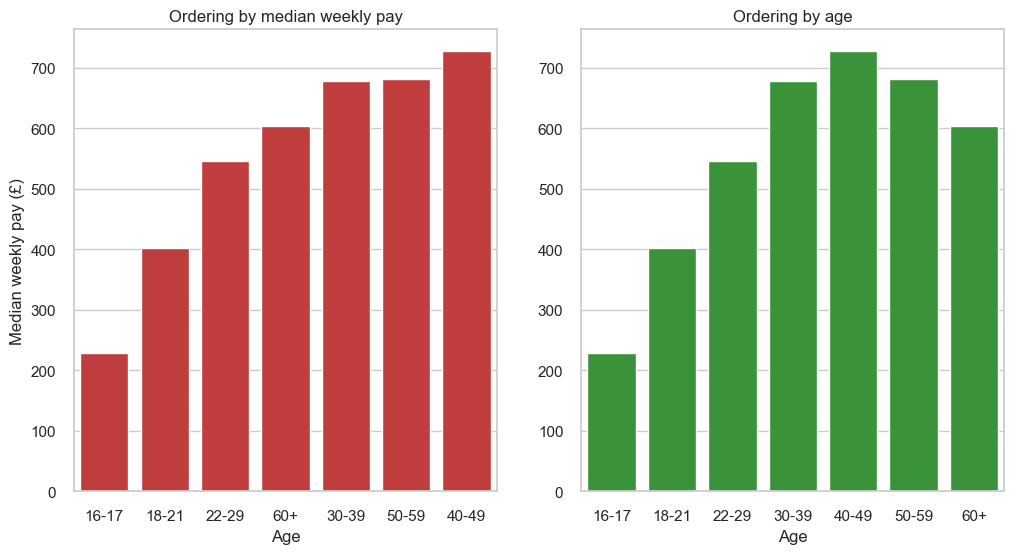

In [7]:
weekly_pay_df = pd.read_csv('media/median_pay_2022.csv')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))
sns.barplot(ax=ax1, x="Age", y="Median weekly pay (£)", data=weekly_pay_df.sort_values(by=['Median weekly pay (£)']),  color='tab:red')
ax1.set_title('Ordering by median weekly pay')
sns.barplot(ax=ax2, x="Age", y="Median weekly pay (£)", data=weekly_pay_df,  color='tab:green')
ax2.set_title('Ordering by age')
ax2.set_ylabel('')
plt.rc('axes', unicode_minus=False)
plt.show()

```{admonition} Things to consider when making bar charts
* Bars should start at zero.
* If the labels are too long, rotate the bar chart.
* Pay attention to order.
* Too many categories can make the graph too busy. Consider an alternate format if this is the case.
```

## Visualising distributions

**Scenario**: Let's say we want to understand how a particular variable is distributed in a dataset. In this case, we can use **histograms** or **density plots**.

Let's look at a histogram of the ages of Titanic passengers.

How can we improve this graph?

In [8]:
titanic_df = sns.load_dataset('titanic')
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


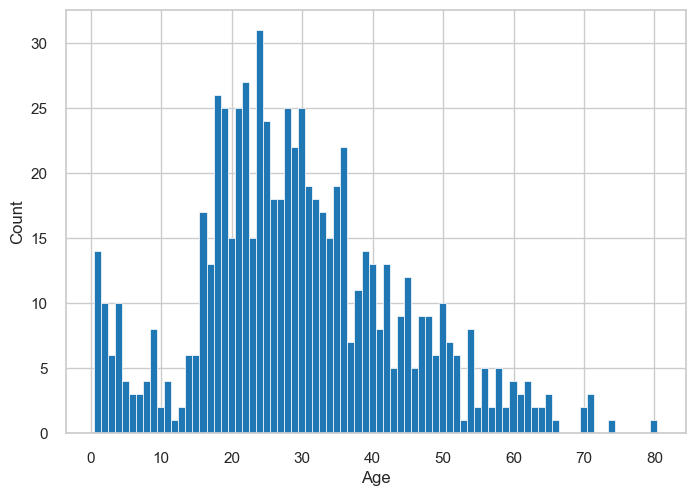

In [9]:
sns.histplot(x='age', data=titanic_df, color='tab:blue', binwidth=1, alpha=1)
plt.xlabel('Age')
plt.show()

Experiment with different bin widths! In the case above, we have some empty bins. Therefore, increasing bin width should fill in some of the gaps. On the other hand, if the bins are too wide, we might lose some of the detail. 

We show examples of different bin widths below:

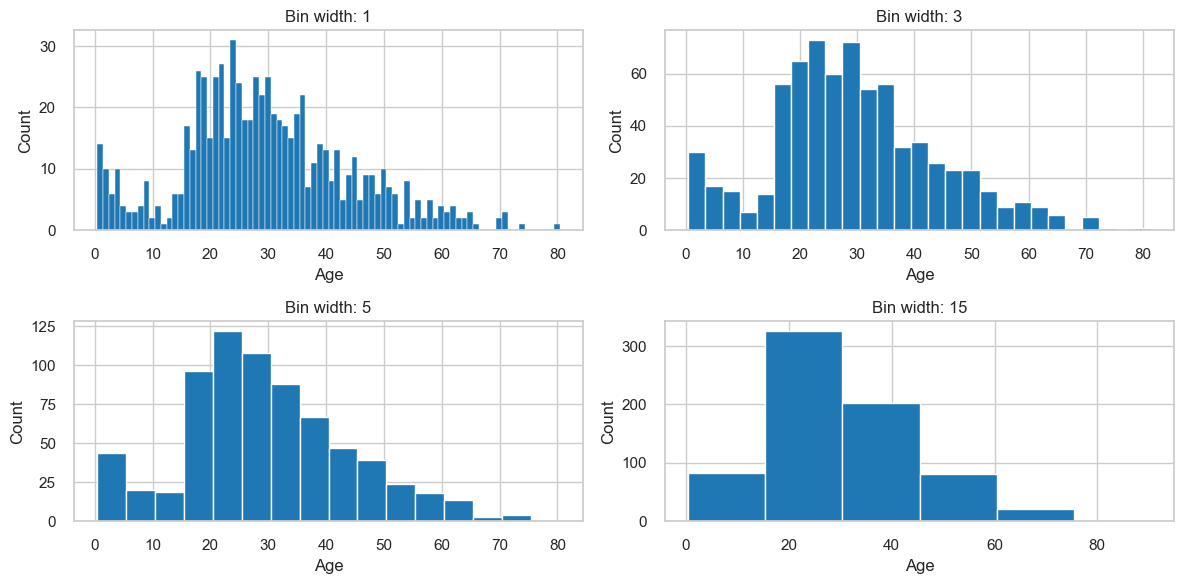

In [10]:
fig, ax = plt.subplots(2,2, figsize=(12, 6))
sns.histplot(ax=ax[0,0], x='age', data=titanic_df, color='tab:blue', binwidth=1, alpha=1)
ax[0,0].set_title('Bin width: 1')
ax[0,0].set_xlabel('Age')
sns.histplot(ax=ax[0,1], x='age', data=titanic_df, color='tab:blue', binwidth=3, alpha=1)
ax[0,1].set_title('Bin width: 3')
ax[0,1].set_xlabel('Age')
sns.histplot(ax=ax[1,0], x='age', data=titanic_df, color='tab:blue', binwidth=5, alpha=1)
ax[1,0].set_title('Bin width: 5')
ax[1,0].set_xlabel('Age')
sns.histplot(ax=ax[1,1], x='age', data=titanic_df, color='tab:blue', binwidth=15, alpha=1)
ax[1,1].set_title('Bin width: 15')
ax[1,1].set_xlabel('Age')
plt.tight_layout()
plt.show()

```{admonition} Things to consider when making histograms
* Pay attention to bin width.
```

If you would like to visualise a smoother approximation of the underlying distribution, you can use a density plot. Again, you should experiment with kernels and bandwidths. 

Bandwidth is a parameter that behaves similarly to bin width. It controls how smooth the density plot is. A larger bandwidth will result in a smoother density plot. The kernel choice affects the shape of the density plot. However, the more data points available, the less effect the kernel choice will have. Therefore they will be reliable for large datasets, but could be misleading when you have fewer data points.

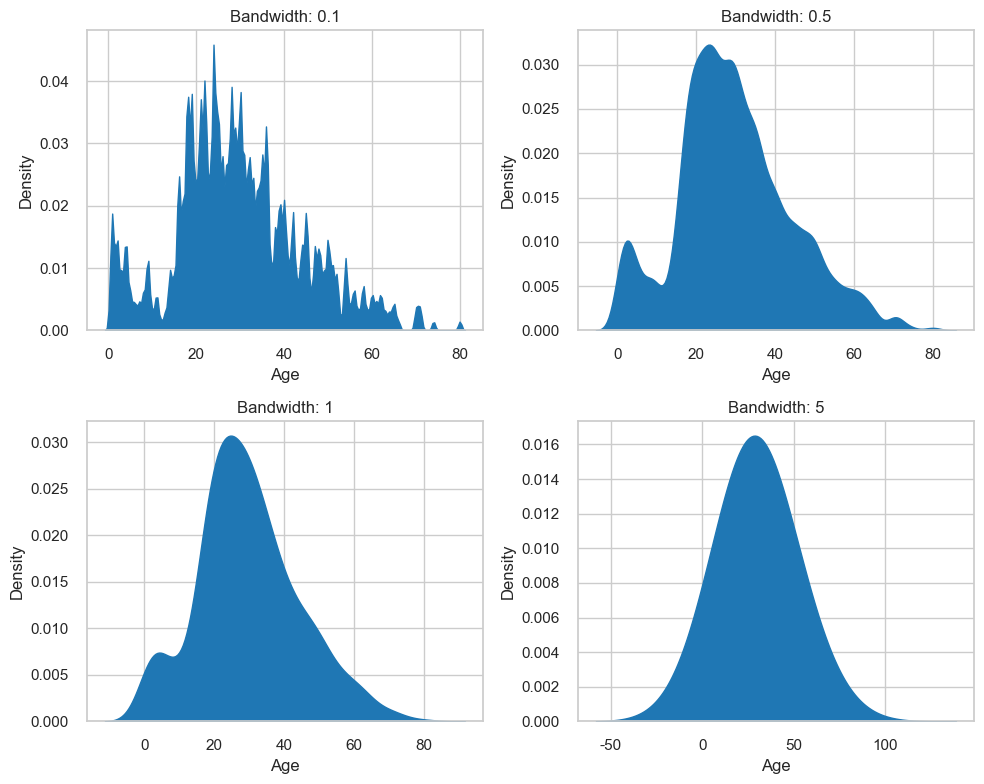

In [11]:
fig, ax = plt.subplots(2,2, figsize=(10, 8))
sns.kdeplot(ax=ax[0,0], x='age', data=titanic_df, color='tab:blue', bw_adjust=0.1, alpha=1, fill=True)
ax[0,0].set_title('Bandwidth: 0.1')
ax[0,0].set_xlabel('Age')
sns.kdeplot(ax=ax[0,1], x='age', data=titanic_df, color='tab:blue', bw_adjust=0.5, alpha=1, fill=True)
ax[0,1].set_title('Bandwidth: 0.5')
ax[0,1].set_xlabel('Age')
sns.kdeplot(ax=ax[1,0], x='age', data=titanic_df, color='tab:blue', bw_adjust=1, alpha=1, fill=True)
ax[1,0].set_title('Bandwidth: 1')
ax[1,0].set_xlabel('Age')
sns.kdeplot(ax=ax[1,1], x='age', data=titanic_df, color='tab:blue', bw_adjust=5, alpha=1, fill=True)
ax[1,1].set_title('Bandwidth: 5')
ax[1,1].set_xlabel('Age')
plt.tight_layout()
plt.show()

Be aware that kernel density estimates can produce nonsensical points. For example, the below plot produces density estimates for negative ages:

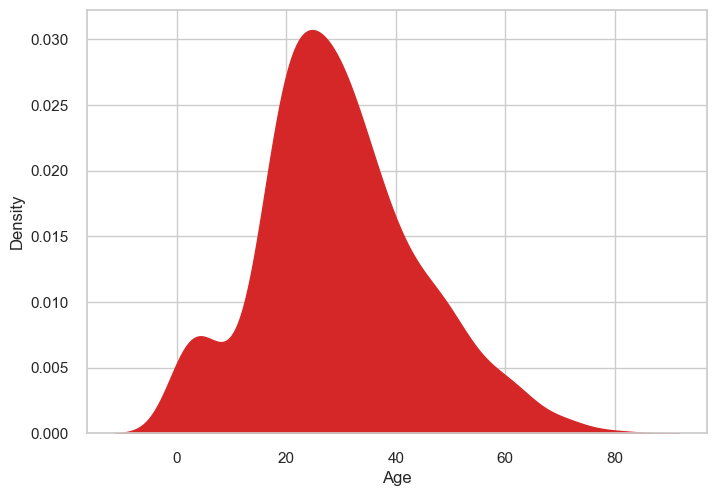

In [12]:
sns.kdeplot(x='age', data=titanic_df, color='tab:red', bw_adjust=1, alpha=1, fill=True)
plt.xlabel('Age')
plt.show()

```{admonition} Things to consider when making density plots
* Experiment with kernel and bandwidth choices
* Sense-check the distribution
```

## Visualising multiple distributions at once

**Scenario**: Let's say we want to see the summary statistics of different groups in a dataset.

What about a point plot? With a point plot, we can show the mean or median as points, and the confidence intervals as error bars. In the below example, we compare the ages of Titanic passengers by class. Do you think this is a good way to visualise this data? If not, why not?

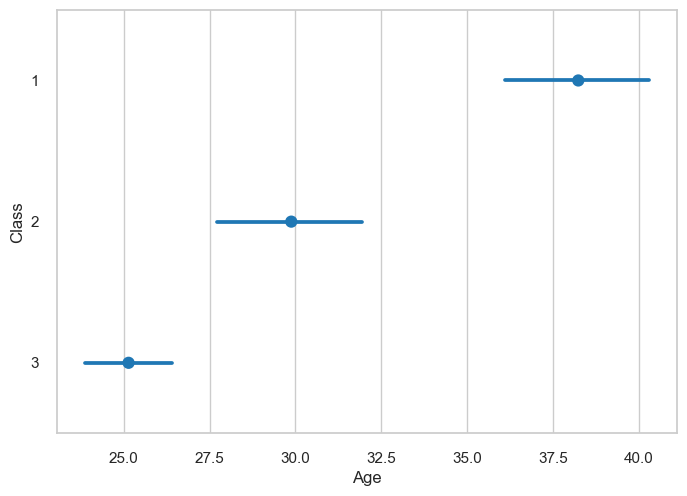

In [13]:
# Convert the class column from a number to a category
titanic_df['class'] = titanic_df['pclass'].astype('category')
sns.pointplot(x='age', y='class', data=titanic_df, color='tab:blue', join=False)
plt.xlabel('Age')
plt.ylabel('Class')
plt.show()

The issue with point plots is that they are not very good at showing the distribution of the data. In addition, we can't tell immediately what the points represent (are they means or medians?) or what the error bars are supposed to be. Symmetric error bars are also not always representative of the data.

Instead, we can use a **box plot**. Box plots are a great way to visualise the distribution of data. They show the median, the 25th and 75th percentiles, and the minimum and maximum values:

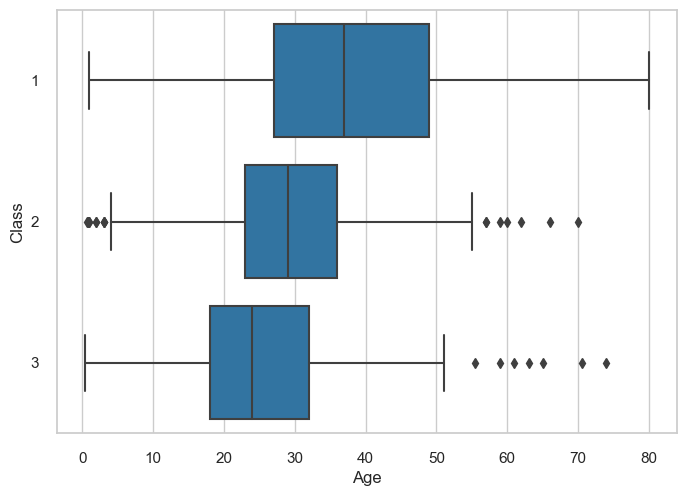

In [14]:
sns.boxplot(x='age', y='class', data=titanic_df, color='tab:blue')
plt.xlabel('Age')
plt.ylabel('Class')
plt.show()

```{admonition} Things to consider when making box plots
* Consider the order of the groups. If there is an intuitive ordering, use that.
* If the labels are too long, rotate the plot
* Consider whether box plots reflect the density of the data properly (e.g. they might not be appropriate if the data is bimodal).
```

## Visualising associations between variables

**Scenario**: Let's say we want to see how two quantitative variables are related to each other. In this case, we can use a **scatter plot**.

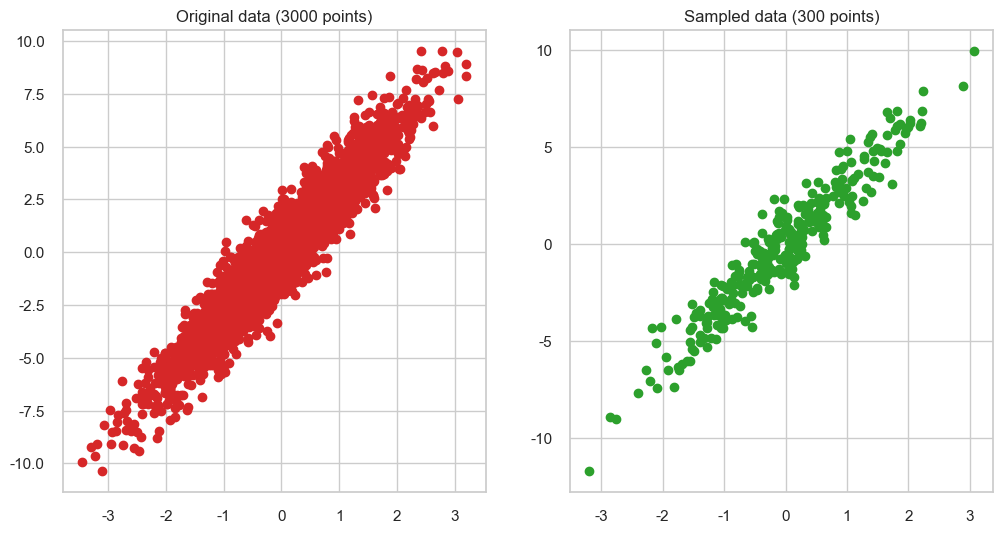

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))
N = 3000
x = np.random.randn(N)
y = 3*x + np.random.randn(N)
ax1.scatter(x,3*x+np.random.randn(N), color='tab:red')
ax1.set_title(f"Original data ({N} points)")

sample_size = 300
idx = np.random.choice(np.arange(N), sample_size, replace=False)
sampled_x = x[idx]
sampled_y = y[idx]
ax2.scatter(sampled_x, sampled_y, color='tab:green')
ax2.set_title(f"Sampled data ({sample_size} points)")
ax2.set_ylabel('')
plt.rc('axes', unicode_minus=False)
plt.show()

```{admonition} Things to consider when making scatter plots
* Consider whether including a trend line is appropriate.
* Beware of overplotting. You might want to sample the data to make it easier to visualise.
* Colour and shape can be used to highlight more than 2 variables.
```

## Visualising changes in variables

**Scenario**: Let's say we want to see how a variable changes over time. In this case, we can use a **line plot**.

In the below example, we'll look at changes in the Dow-Jones Industrial Stock Price Index. How can we improve this graph?

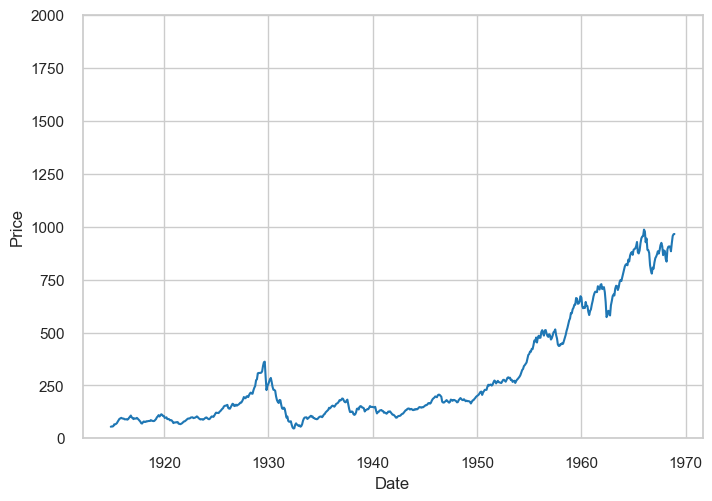

In [16]:
dowjones_df = sns.load_dataset("dowjones")
dowjones_df['Date'] = pd.to_datetime(dowjones_df['Date'])
sns.lineplot(x="Date", y="Price", data=dowjones_df, color='tab:blue')
plt.ylim(0, 2000)
plt.show()

The above example exaggerates the price intervals. It's important to choose the right intervals for your data:

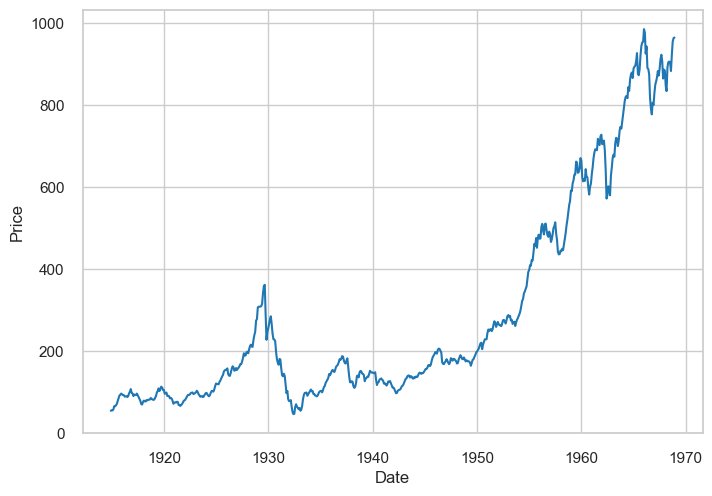

In [17]:
sns.lineplot(x="Date", y="Price", data=dowjones_df, color='tab:blue')
plt.show()

```{admonition} Things to consider when making line plots
* Consider the intervals you are using. Are they appropriate for the data?
* You can compare different trends by plotting multiple line plots on the same graph. However, consider if they will be too difficult to read.
```

## When to use tables

**Scenario**: In some cases, a table might be better than a graph. For example, if you want to look up specific values, a table might be more appropriate.

The below examples show different ways to format tables using the top-5 weekend gross ticket sales. Formatting is somewhat subjective, but there are some things that you might want to consider to improve readability.

```{admonition} Things to consider when making tables
* Avoid vertical lines in the table. They can make it difficult to read.
* Avoid horizontal lines between data rows unless they help to group the data.
* Left-align text.
* Align headers with their corresponding columns.
* Consider using a different format if there are too many rows or columns (e.g. can you break it down into smaller tables?)
```

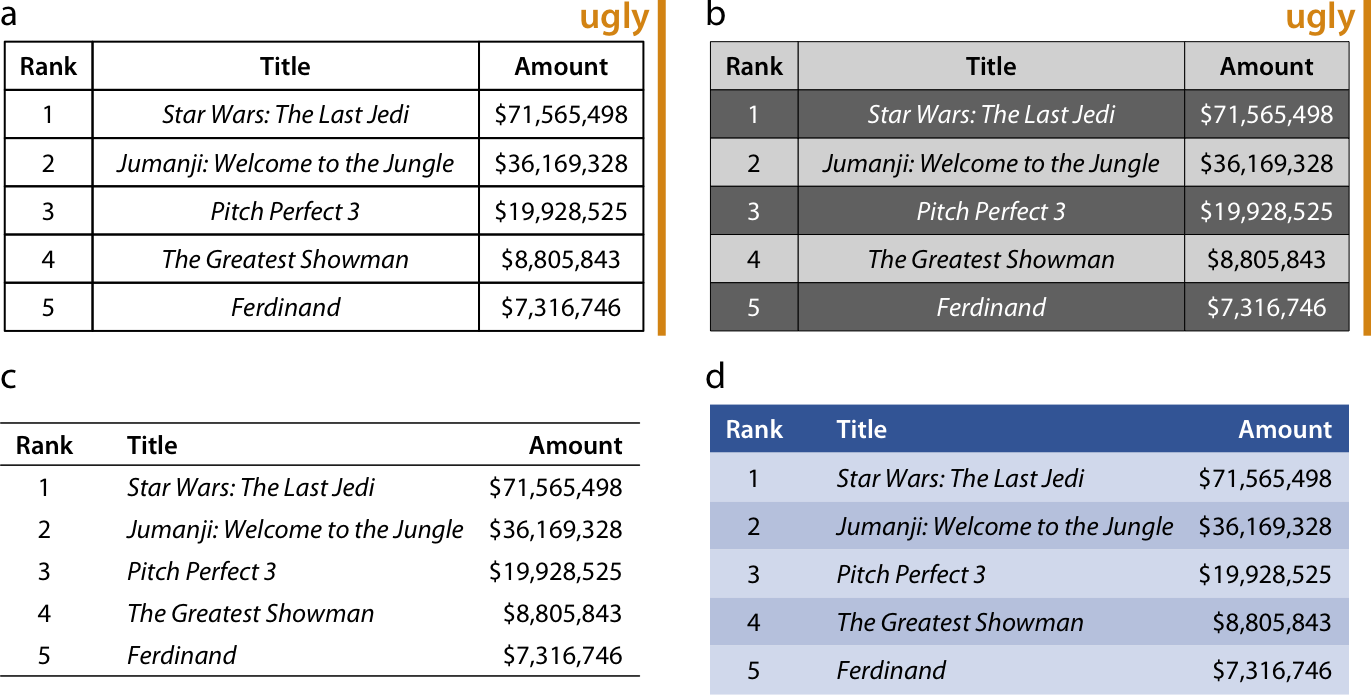

In [18]:
with Image.open('media/tables.png') as img:
    display(img)